<a href="https://colab.research.google.com/github/sergiyenkoalina/machine-learning-course/blob/main/HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдені параметри моделі близькими до ваших найкращих припущень?

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [48]:
medical_df = pd.read_csv('/content/drive/MyDrive/data/medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [6]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [7]:
x_age=non_smoker_df['age']

In [8]:
X = x_age.values.reshape(-1, 1)
X = np.hstack((np.ones((X.shape[0], 1)), X))  # + bias терм
y = non_smoker_df['charges'].values

In [9]:
MNK_coefs = normal_equations(X, y)

In [10]:
MNK_coefs #коефіцієнти моделі

array([-2091.42055657,   267.24891283])

In [11]:
predictions_MNK = np.dot(X, MNK_coefs)
predictions_MNK

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

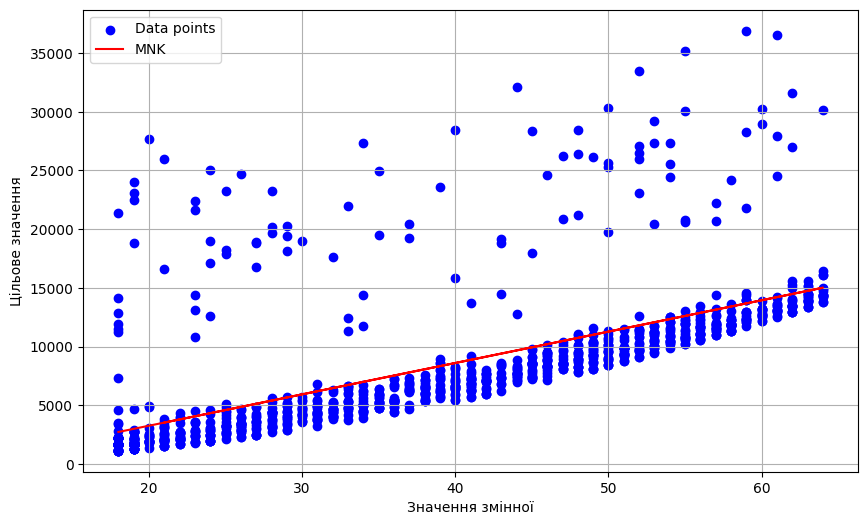

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(x_age, y, color='blue', label='Data points')
plt.plot(x_age, predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

rmse_MNK = rmse(y, predictions_MNK)

In [14]:
rmse_MNK

4662.505766636395

In [15]:
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    a, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = a * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        a_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        a = a - lr * a_gradient
        b = b - lr * b_gradient
    return a, b, errors

In [16]:
alpha_1=0.1
alpha_2=0.01
alpha_3=0.001

In [17]:
#y = a*x + b
a, b, errors = full_batch_gradient_descent(X, y, alpha_1, epochs=1000)
a, b

(4217.134148928099, 4217.134148928103)

In [18]:
predictions_fbgd_alpha_1 = a * X[:, 0] + b
predictions_fbgd_alpha_1

array([8434.26829786, 8434.26829786, 8434.26829786, ..., 8434.26829786,
       8434.26829786, 8434.26829786])

In [19]:
rmse_fbgd_alpha_1 = rmse(y, predictions_fbgd_alpha_1)
rmse_fbgd_alpha_1

5990.964530287611

In [20]:
a, b, errors = full_batch_gradient_descent(X, y, alpha_2, epochs=1000)
a, b

(4217.13414892809, 4217.13414892809)

In [21]:
predictions_fbgd_alpha_2 = a * X[:, 0] + b
predictions_fbgd_alpha_2

array([8434.26829786, 8434.26829786, 8434.26829786, ..., 8434.26829786,
       8434.26829786, 8434.26829786])

In [22]:
rmse_fbgd_alpha_2 = rmse(y, predictions_fbgd_alpha_2)
rmse_fbgd_alpha_2

5990.964530287611

In [23]:
a, b, errors = full_batch_gradient_descent(X, y, alpha_3, epochs=1000)
a, b

(4140.511733223125, 4140.511733223125)

In [24]:
predictions_fbgd_alpha_3 = a * X[:, 0] + b
predictions_fbgd_alpha_3

array([8281.02346645, 8281.02346645, 8281.02346645, ..., 8281.02346645,
       8281.02346645, 8281.02346645])

In [25]:
rmse_fbgd_alpha_3 = rmse(y, predictions_fbgd_alpha_3)
rmse_fbgd_alpha_3

5992.924159499945

Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу charges за age для некурців (датафрейм non_smoker_df) з допомогою
З scikit-learn.LinearRegression. Тут зверніть увагу, що вхід X має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись X.to_frame() щоб конвертувати колонку в датафрейм.

Для кожного методу

знайдіть і виведіть коефіцієнти моделі
обчисліть прогнози моделі і збережіть в окрему змінну
порахуйте точність прогнозу RMSE

In [26]:
from sklearn.linear_model import LinearRegression

# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [27]:
lin_reg.fit(X, y)

LinearRegression()

In [28]:
lin_reg.coef_, lin_reg.intercept_

(array([  0.        , 267.24891283]), -2091.4205565650827)

In [29]:
predictions_sklearn = lin_reg.predict(X)
predictions_sklearn

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [30]:
rmse_sklearn = rmse(y, predictions_sklearn)
rmse_sklearn

4662.505766636395

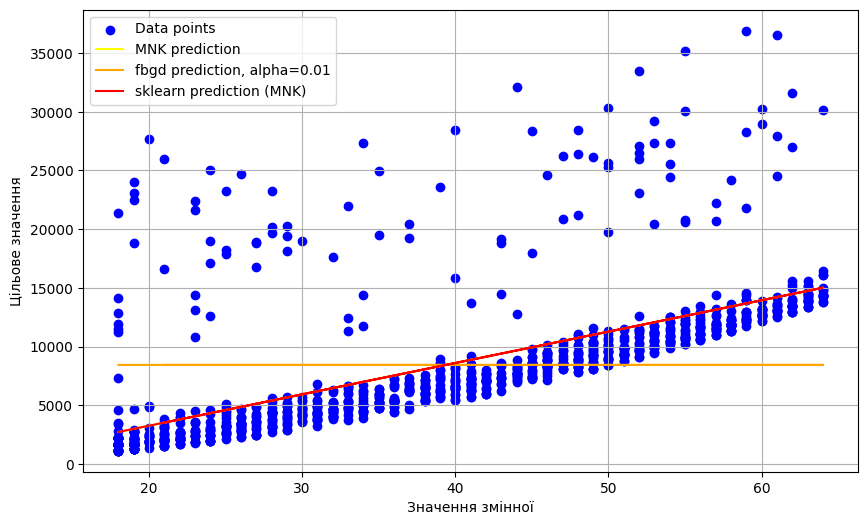

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(x_age, y, color='blue', label='Data points')
plt.plot(x_age, predictions_MNK, color='yellow', label='MNK prediction')
plt.plot(x_age, predictions_fbgd_alpha_2, color='orange', label='fbgd prediction, alpha=0.01')
plt.plot(x_age, predictions_sklearn, color='red', label='sklearn prediction (MNK)')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 color_discrete_sequence=px.colors.qualitative.Antique,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)

fig.add_trace(
    go.Scatter(
        x=non_smoker_df['age'],
        y=predictions_MNK,
        mode='lines',
        line=dict(color='yellow', width=2),
        name='MNK prediction'
    )
)

fig.add_trace(
    go.Scatter(
        x=non_smoker_df['age'],
        y=predictions_fbgd_alpha_2,
        mode='lines',
        line=dict(color='red', width=2),
        name='fbgd prediction, alpha=0.01'
    )
)

fig.add_trace(
    go.Scatter(
        x=non_smoker_df['age'],
        y=predictions_sklearn,
        mode='lines',
        line=dict(color='green', width=2),
        name='sklearn prediction (MNK)'
    )
)

fig.show()

**Спостереження**: Результати модей МНК та градієнтний спуск помітно відрізніються. Так як у градієнтного спуску х та у координати вийшли однакові, можливо в ньому є помилка 😅. Так як результати та rmse МНК, написаного вручну та реалізованого через sklearn не відрізняються одне від одного, можна зробити висновок, що він був правильно реалізований вручну через numpy. МНК має менший rmse, тому прогнозує результат краще, що також можна побачити візуально на графіку.

**Завдання 2** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних зборів для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [49]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [50]:
x_age=smoker_df['age']

In [51]:
X = x_age.values.reshape(-1, 1)
X = np.hstack((np.ones((X.shape[0], 1)), X))  # + bias терм
y = smoker_df['charges'].values

In [53]:
lin_reg_s = LinearRegression()
lin_reg_s

LinearRegression()

In [55]:
lin_reg_s.fit(X, y)

LinearRegression()

In [56]:
lin_reg_s.coef_, lin_reg_s.intercept_

(array([  0.        , 305.23760211]), 20294.12812691597)

In [57]:
predictions_sklearn_s = lin_reg_s.predict(X)

In [58]:
rmse_sklearn_s = rmse(y, predictions_sklearn_s)
rmse_sklearn_s

10711.00334810241

In [63]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 color_discrete_sequence=px.colors.qualitative.Antique,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)

fig.add_trace(
    go.Scatter(
        x=smoker_df['age'],
        y=predictions_sklearn_s,
        mode='lines',
        line=dict(color='red', width=2),
        name='MNK prediction for smokers'
    )
)

**Спостереження**: лінія непогано показує тенденцію, але rmse приблизно 10к, що є 1/6 від загального діапазону даних. Таку модель буде не оптимально використовувати у комерційних задачах. На графіку помітно, що серед курців є дві лінійні тенденції (побулована модель як раз посередині), які, певно, зумовлені значенням яокгось третього фактора крім паління та віку, це варто було б дослідити далі для побудови якіснішої моделі.